### Objectif

L'objectif de ce travail pratique est de manipuler, analyser et modéliser un ensemble de données concernant des produits alimentaires. Les étudiants devront appliquer des techniques de régression linéaire, classification binaire, et classification multiclasse en utilisant les caractéristiques mathématiques dérivées des données.

## Partie 1 & 2 : Prétraitement des données & Régression Linéaire

## Importer mon bibliotheque 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## permet de creer son model 
import tensorflow as tf

##  diviser mon dataset pour les entrainé et testé 
from sklearn.model_selection import train_test_split

##Sequential à partir de keras.models est nécessaire pour créer et définir des modèles de réseaux de neurones séquentiels en Keras.
from keras.models import Sequential


#permet de creer des couche dense
from keras.layers import Dense

from sklearn.preprocessing import LabelEncoder

##
from sklearn.datasets import fetch_openml


## pour le model 
from sklearn.linear_model import LinearRegression


from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix



## Charger mon dataset 

In [2]:
df_1 = pd.read_csv("D:/CourIPSSI/Cour_IA_IPPSI_1/df_simple.csv")

df_1

,ProductID,Description,Categorie,Prix,Nombre_Avis,Base_Feature,Feature_Square,Feature_Sqrt,Feature_Log,Feature_Exp,Feature_Cat_Mult,Note
0,1,Without focus father mission sister.,Fruits,38.08,51,36.340430,1320.626861,6.028302,3.592931,1.438217,36.340430,0.269804
1,2,Push indicate candidate sea.,Fruits,95.12,71,45.332898,2055.071599,6.732971,3.814033,1.573542,45.332898,0.366058
2,3,Ago begin meet season.,Snacks,73.47,480,40.782040,1663.174769,6.386082,3.708242,1.503537,122.346119,1.135590
3,4,Minute without myself individual.,Boissons,60.27,560,84.901520,7208.268031,9.214202,4.441492,2.337344,169.803039,1.662673
4,5,Test find structure such.,Boissons,16.45,19,34.731803,1206.298137,5.893369,3.547656,1.415267,69.463606,0.601304
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Blue employee lead management wait.,Produits laitiers,89.84,867,36.445326,1328.261788,6.036996,3.595813,1.439727,145.781304,1.368071
4996,4997,Cover doctor truth executive same.,Boissons,12.82,37,78.033461,6089.221043,8.833655,4.357138,2.182202,156.066922,1.514148
4997,4998,Song tree cup security team explain.,Snacks,33.46,992,44.425156,1973.594464,6.665220,3.793806,1.559323,133.275467,1.247846
4998,4999,Nearly push finish purpose event drop.,Produits laitiers,81.76,583,47.004487,2209.421791,6.855982,3.850243,1.600066,188.017948,1.799180


## Analyser mes données  

In [3]:
#Afficher les colonnes

df_1.columns

Index(['ProductID', 'Description', 'Categorie', 'Prix', 'Nombre_Avis',
       'Base_Feature', 'Feature_Square', 'Feature_Sqrt', 'Feature_Log',
       'Feature_Exp', 'Feature_Cat_Mult', 'Note'],
      dtype='object')

In [4]:
# Affichzer le nombre de ligne et colonne et la taille du datasat

print("ligne_colonne:" , df_1.shape , "  ", "size :" , df_1.size )

ligne_colonne: (5000, 12)    size : 60000


In [5]:
df_1.info()

df_1.dtypes

df_1.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductID         5000 non-null   int64  
 1   Description       5000 non-null   object 
 2   Categorie         5000 non-null   object 
 3   Prix              5000 non-null   float64
 4   Nombre_Avis       5000 non-null   int64  
 5   Base_Feature      5000 non-null   float64
 6   Feature_Square    5000 non-null   float64
 7   Feature_Sqrt      5000 non-null   float64
 8   Feature_Log       5000 non-null   float64
 9   Feature_Exp       5000 non-null   float64
 10  Feature_Cat_Mult  5000 non-null   float64
 11  Note              5000 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 468.9+ KB


ProductID           0
Description         0
Categorie           0
Prix                0
Nombre_Avis         0
Base_Feature        0
Feature_Square      0
Feature_Sqrt        0
Feature_Log         0
Feature_Exp         0
Feature_Cat_Mult    0
Note                0
dtype: int64

In [6]:
df_1.describe()

,ProductID,Prix,Nombre_Avis,Base_Feature,Feature_Square,Feature_Sqrt,Feature_Log,Feature_Exp,Feature_Cat_Mult,Note
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,50.186446,500.933400,55.159040,3716.068262,7.183296,3.863110,1.794945,165.778108,1.590786
std,1443.520003,28.673748,288.620609,25.955410,2910.522470,1.886798,0.591751,0.461438,115.871771,1.179776
min,1.000000,1.000000,1.000000,10.016668,100.333629,3.164912,2.304250,1.105355,10.092007,0.000000
25%,1250.750000,25.137500,248.000000,33.331283,1110.974400,5.773325,3.506496,1.395584,71.789126,0.640188
50%,2500.500000,50.505000,505.500000,55.167645,3043.469220,7.427492,4.010377,1.736161,138.078390,1.301075
75%,3750.250000,75.062500,753.000000,77.425971,5994.780918,8.799203,4.349322,2.168986,241.052015,2.350793
max,5000.000000,99.970000,999.000000,99.976715,9995.343443,9.998836,4.604937,2.717649,499.698465,5.000000


## Traitement de la data 

In [7]:
## transformer la colonne "Catégorie"  en numérique 

label_encoder = LabelEncoder()

# Adapter le LabelEncoder aux données de 'Catégorie' et remplacer les valeurs par les entiers correspondants
df_1['Categorie_encoded']= label_encoder.fit_transform(df_1['Categorie'])

# Afficher les premières lignes pour vérifier les modifications
print(df_1[['Categorie_encoded' , 'Categorie']])

      Categorie_encoded          Categorie
0                     1             Fruits
1                     1             Fruits
2                     3             Snacks
3                     0           Boissons
4                     0           Boissons
...                 ...                ...
4995                  2  Produits laitiers
4996                  0           Boissons
4997                  3             Snacks
4998                  2  Produits laitiers
4999                  3             Snacks

[5000 rows x 2 columns]


In [8]:
df_1.dtypes


ProductID              int64
Description           object
Categorie             object
Prix                 float64
Nombre_Avis            int64
Base_Feature         float64
Feature_Square       float64
Feature_Sqrt         float64
Feature_Log          float64
Feature_Exp          float64
Feature_Cat_Mult     float64
Note                 float64
Categorie_encoded      int32
dtype: object

## Analyse de données et tracer un graphe 
Regarder les valeurs des données pour comprendre les données, et essayer de trouver des correlations

In [9]:
df_1.describe()

,ProductID,Prix,Nombre_Avis,Base_Feature,Feature_Square,Feature_Sqrt,Feature_Log,Feature_Exp,Feature_Cat_Mult,Note,Categorie_encoded
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,50.186446,500.933400,55.159040,3716.068262,7.183296,3.863110,1.794945,165.778108,1.590786,2.015400
std,1443.520003,28.673748,288.620609,25.955410,2910.522470,1.886798,0.591751,0.461438,115.871771,1.179776,1.413776
min,1.000000,1.000000,1.000000,10.016668,100.333629,3.164912,2.304250,1.105355,10.092007,0.000000,0.000000
25%,1250.750000,25.137500,248.000000,33.331283,1110.974400,5.773325,3.506496,1.395584,71.789126,0.640188,1.000000
50%,2500.500000,50.505000,505.500000,55.167645,3043.469220,7.427492,4.010377,1.736161,138.078390,1.301075,2.000000
75%,3750.250000,75.062500,753.000000,77.425971,5994.780918,8.799203,4.349322,2.168986,241.052015,2.350793,3.000000
max,5000.000000,99.970000,999.000000,99.976715,9995.343443,9.998836,4.604937,2.717649,499.698465,5.000000,4.000000


<Figure size 1000x700 with 0 Axes>

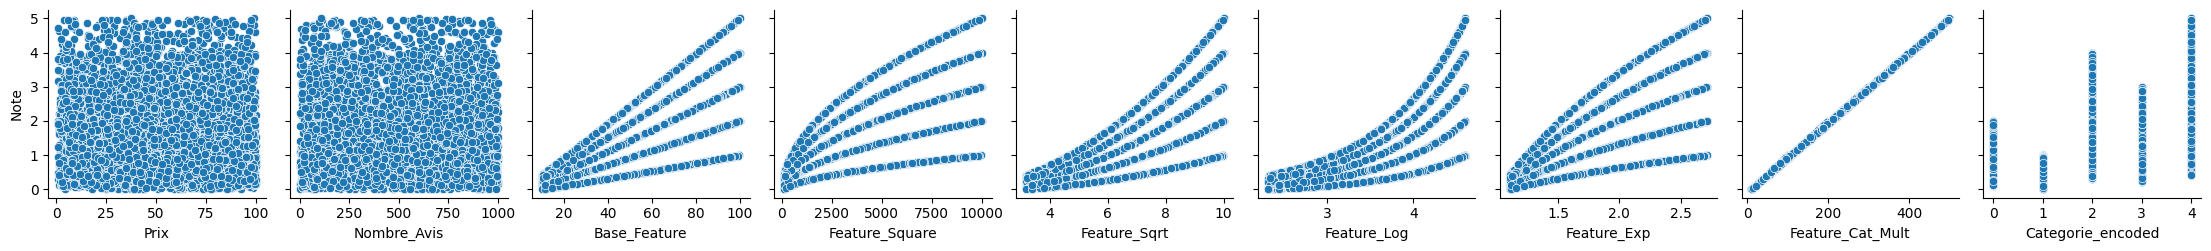

In [10]:
#tracer un graphe pour voir les colonne important 

plt.figure(figsize=(10, 7))

sns.pairplot(df_1 , x_vars=['Prix','Nombre_Avis','Base_Feature','Feature_Square','Feature_Sqrt','Feature_Log','Feature_Exp','Feature_Cat_Mult','Categorie_encoded']  ,y_vars=["Note"] )

plt.show()



# Sélectionner les colonnes  pertinentes pour la prédiction 

que je met dans un dataframme appelé :   df_utile

In [11]:
df_1.columns

Index(['ProductID', 'Description', 'Categorie', 'Prix', 'Nombre_Avis',
       'Base_Feature', 'Feature_Square', 'Feature_Sqrt', 'Feature_Log',
       'Feature_Exp', 'Feature_Cat_Mult', 'Note', 'Categorie_encoded'],
      dtype='object')

In [12]:
#utliser le columns utilies 

colmun_supp = ['ProductID', 'Description', 'Categorie', 'Categorie_encoded', 'Prix', 'Nombre_Avis', 'Base_Feature']

# Supprimer les colonnes spécifiées du DataFrame
df_utile = df_1.drop(columns=colmun_supp)


df_utile


,Feature_Square,Feature_Sqrt,Feature_Log,Feature_Exp,Feature_Cat_Mult,Note
0,1320.626861,6.028302,3.592931,1.438217,36.340430,0.269804
1,2055.071599,6.732971,3.814033,1.573542,45.332898,0.366058
2,1663.174769,6.386082,3.708242,1.503537,122.346119,1.135590
3,7208.268031,9.214202,4.441492,2.337344,169.803039,1.662673
4,1206.298137,5.893369,3.547656,1.415267,69.463606,0.601304
...,...,...,...,...,...,...
4995,1328.261788,6.036996,3.595813,1.439727,145.781304,1.368071
4996,6089.221043,8.833655,4.357138,2.182202,156.066922,1.514148
4997,1973.594464,6.665220,3.793806,1.559323,133.275467,1.247846
4998,2209.421791,6.855982,3.850243,1.600066,188.017948,1.799180


## Diviser mon dataframme 

In [13]:
x = df_utile.drop('Note' , axis=1)
y = df_utile['Note']

x,y 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x , y 
 

(      Feature_Square  Feature_Sqrt  Feature_Log  Feature_Exp  Feature_Cat_Mult
 0        1320.626861      6.028302     3.592931     1.438217         36.340430
 1        2055.071599      6.732971     3.814033     1.573542         45.332898
 2        1663.174769      6.386082     3.708242     1.503537        122.346119
 3        7208.268031      9.214202     4.441492     2.337344        169.803039
 4        1206.298137      5.893369     3.547656     1.415267         69.463606
 ...              ...           ...          ...          ...               ...
 4995     1328.261788      6.036996     3.595813     1.439727        145.781304
 4996     6089.221043      8.833655     4.357138     2.182202        156.066922
 4997     1973.594464      6.665220     3.793806     1.559323        133.275467
 4998     2209.421791      6.855982     3.850243     1.600066        188.017948
 4999     4976.473908      8.399055     4.256238     2.024740        211.632382
 
 [5000 rows x 5 columns],
 0       0.2

# Création du modèle

In [14]:

model = LinearRegression()

# Entrainement du modèle

In [15]:
model.fit(x_train , y_train)

LinearRegression()

## Prédictions de mon model 

In [16]:
y_pred = model.predict(x_test)
y_pred

array([ 1.24876243e+00,  2.99448587e+00,  2.26878465e+00,  2.10149474e-01,
        2.09201288e+00,  3.29454342e+00,  2.51449745e+00,  4.59756034e-01,
        9.04761183e-01,  9.66190309e-01,  6.72561182e-01,  3.47150765e-01,
        1.04376593e+00,  1.95843016e+00,  8.54884974e-02,  1.59696139e+00,
        9.40427597e-01,  2.38346461e+00,  8.65500380e-01,  1.62611771e+00,
        4.97103242e-01,  3.07114253e+00,  1.46481696e-01,  1.81842194e+00,
        1.30615281e+00,  2.86172771e+00,  4.58740191e+00,  1.46863241e+00,
        2.61341245e+00,  1.60615832e+00,  1.69885506e+00,  7.09119979e-02,
        8.23453573e-01,  1.43599562e+00,  4.41971707e-01,  4.37987774e-03,
        2.56768229e+00,  1.38982260e+00,  1.13121135e+00,  4.12495647e-01,
        2.78559662e-01,  1.92653982e+00,  1.86194097e+00,  2.44893641e+00,
        7.41095546e-01,  7.00765751e-01,  4.32460952e-02,  9.13245454e-01,
        4.24969732e-02,  1.26965622e+00,  4.68177432e+00,  1.98330612e+00,
        2.70156920e+00,  

# Evaluation de mon modèle

Evaluation de mon modèle en comparant les valeurs prédites avec les valeurs réelles

In [17]:
##coefficient de corrélation 
R2 = model.score(x_test, y_test)

R2


1.0

## Comparer les valeurs reel avec les valeurs prédit dans un graphe

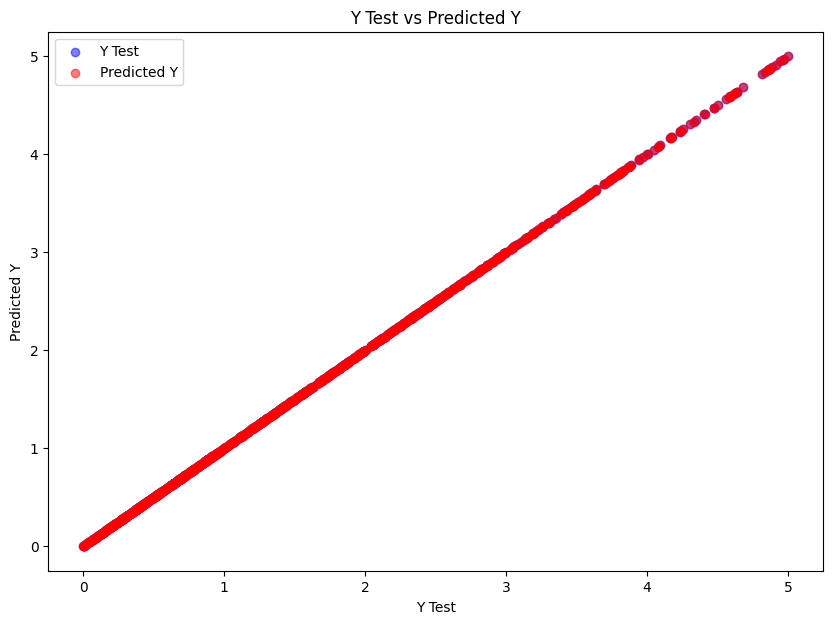

In [18]:

plt.figure(figsize=(10, 7))

# Tracer les données y_test avec la couleur bleue
plt.scatter(y_test, y_test, color='blue', label='Y Test', alpha=0.5)

# Tracer les données y_pred avec la couleur rouge
plt.scatter(y_test, y_pred, color='red', label='Predicted Y', alpha=0.5)

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Y Test vs Predicted Y')

plt.legend()

plt.show()


## Partie 2 Classification Binaire

# Sélectionner les données pertinentes

In [19]:
## crrer une nouvelle colonne 'Bien_note'

df_utile['Bien_Note'] = df_utile['Note'] > 3

df_utile 

,Feature_Square,Feature_Sqrt,Feature_Log,Feature_Exp,Feature_Cat_Mult,Note,Bien_Note
0,1320.626861,6.028302,3.592931,1.438217,36.340430,0.269804,False
1,2055.071599,6.732971,3.814033,1.573542,45.332898,0.366058,False
2,1663.174769,6.386082,3.708242,1.503537,122.346119,1.135590,False
3,7208.268031,9.214202,4.441492,2.337344,169.803039,1.662673,False
4,1206.298137,5.893369,3.547656,1.415267,69.463606,0.601304,False
...,...,...,...,...,...,...,...
4995,1328.261788,6.036996,3.595813,1.439727,145.781304,1.368071,False
4996,6089.221043,8.833655,4.357138,2.182202,156.066922,1.514148,False
4997,1973.594464,6.665220,3.793806,1.559323,133.275467,1.247846,False
4998,2209.421791,6.855982,3.850243,1.600066,188.017948,1.799180,False


## Traiter le dataframme 

In [20]:
df_utile.dtypes

Feature_Square      float64
Feature_Sqrt        float64
Feature_Log         float64
Feature_Exp         float64
Feature_Cat_Mult    float64
Note                float64
Bien_Note              bool
dtype: object

In [21]:
## transformer la colonne "Bien_note"  en numérique 

label_encoder = LabelEncoder()

# Adapter le LabelEncoder aux données de 'Catégorie' et remplacer les valeurs par les entiers correspondants
df_utile['Bien_Note_encode']= label_encoder.fit_transform(df_utile['Bien_Note'])

# # Afficher les premières lignes pour vérifier les modifications
print(df_utile[['Bien_Note' , 'Bien_Note_encode']])


      Bien_Note  Bien_Note_encode
0         False                 0
1         False                 0
2         False                 0
3         False                 0
4         False                 0
...         ...               ...
4995      False                 0
4996      False                 0
4997      False                 0
4998      False                 0
4999      False                 0

[5000 rows x 2 columns]


In [22]:
df_utile = df_utile.drop("Bien_Note" , axis=1)

In [23]:
df_utile

,Feature_Square,Feature_Sqrt,Feature_Log,Feature_Exp,Feature_Cat_Mult,Note,Bien_Note_encode
0,1320.626861,6.028302,3.592931,1.438217,36.340430,0.269804,0
1,2055.071599,6.732971,3.814033,1.573542,45.332898,0.366058,0
2,1663.174769,6.386082,3.708242,1.503537,122.346119,1.135590,0
3,7208.268031,9.214202,4.441492,2.337344,169.803039,1.662673,0
4,1206.298137,5.893369,3.547656,1.415267,69.463606,0.601304,0
...,...,...,...,...,...,...,...
4995,1328.261788,6.036996,3.595813,1.439727,145.781304,1.368071,0
4996,6089.221043,8.833655,4.357138,2.182202,156.066922,1.514148,0
4997,1973.594464,6.665220,3.793806,1.559323,133.275467,1.247846,0
4998,2209.421791,6.855982,3.850243,1.600066,188.017948,1.799180,0


# Divises mon dataset

In [24]:
df_utile.columns

Index(['Feature_Square', 'Feature_Sqrt', 'Feature_Log', 'Feature_Exp',
       'Feature_Cat_Mult', 'Note', 'Bien_Note_encode'],
      dtype='object')

In [25]:
#diviser  mon dataset 
x = df_utile.drop('Bien_Note_encode' , axis=1)
y = df_utile['Bien_Note_encode']


# # Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# creation du model 

In [26]:
model = Sequential([
    Dense(60, activation='relu', input_shape=(6,)),
    Dense(60, activation='relu'),
    Dense(1, activation='sigmoid'),  # Utilisation de sigmoid pour une classification binaire 
])


##compliation du model 

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

d:\CourIPSSI\Cour_IA_IPPSI_1\envTp1IA\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Entrainement du model

In [27]:
model.fit(x_train, y_train, epochs=5, batch_size=9)


Epoch 1/5


445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8602 - mean_squared_error: 0.8602
Epoch 2/5
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8603 - mean_squared_error: 0.8603
Epoch 3/5
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8536 - mean_squared_error: 0.8536
Epoch 4/5
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8630 - mean_squared_error: 0.8630
Epoch 5/5
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8631 - mean_squared_error: 0.8631


## Evaluation du model

In [28]:
loss, mean_squared_error = model.evaluate(x_test, y_test) 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8696 - mean_squared_error: 0.8694  


## Partie 4 Classification Multiclasse


## Selectionner les colonnes utiles 

In [29]:
df_1 = df_1.drop(['ProductID', 'Description', 'Categorie'], axis=1)

df_1

,Prix,Nombre_Avis,Base_Feature,Feature_Square,Feature_Sqrt,Feature_Log,Feature_Exp,Feature_Cat_Mult,Note,Categorie_encoded
0,38.08,51,36.340430,1320.626861,6.028302,3.592931,1.438217,36.340430,0.269804,1
1,95.12,71,45.332898,2055.071599,6.732971,3.814033,1.573542,45.332898,0.366058,1
2,73.47,480,40.782040,1663.174769,6.386082,3.708242,1.503537,122.346119,1.135590,3
3,60.27,560,84.901520,7208.268031,9.214202,4.441492,2.337344,169.803039,1.662673,0
4,16.45,19,34.731803,1206.298137,5.893369,3.547656,1.415267,69.463606,0.601304,0
...,...,...,...,...,...,...,...,...,...,...
4995,89.84,867,36.445326,1328.261788,6.036996,3.595813,1.439727,145.781304,1.368071,2
4996,12.82,37,78.033461,6089.221043,8.833655,4.357138,2.182202,156.066922,1.514148,0
4997,33.46,992,44.425156,1973.594464,6.665220,3.793806,1.559323,133.275467,1.247846,3
4998,81.76,583,47.004487,2209.421791,6.855982,3.850243,1.600066,188.017948,1.799180,2


## Diviser mon dataframme 


In [30]:

y =df_1['Categorie_encoded']

x= df_1.drop('Categorie_encoded', axis=1)

x , y 



# Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test

,Prix,Nombre_Avis,Base_Feature,Feature_Square,Feature_Sqrt,Feature_Log,Feature_Exp,Feature_Cat_Mult,Note
1501,48.44,697,26.021829,677.135594,5.101160,3.258936,1.297213,78.065488,0.683897
2586,8.11,233,53.222860,2832.672837,7.295400,3.974488,1.702723,159.668580,1.520152
2653,6.18,657,55.207155,3047.829918,7.430152,4.011093,1.736847,110.414309,1.027818
1055,35.72,827,67.962379,4618.885006,8.243930,4.218954,1.973135,339.811897,3.344135
705,99.01,196,83.409899,6957.211197,9.132902,4.423767,2.302738,333.639595,3.304317
...,...,...,...,...,...,...,...,...,...
4711,46.34,948,17.022868,289.778047,4.125878,2.834558,1.185576,34.045737,0.240287
2313,70.52,344,47.653723,2270.877360,6.903168,3.863961,1.610488,190.614894,1.825769
3214,23.73,911,24.773297,613.716227,4.977278,3.209766,1.281118,99.093187,0.894519
2732,6.73,20,80.426081,6468.354463,8.968059,4.387339,2.235044,80.426081,0.758722


## Creer et Entraîner le modèle sur l'ensemble d'entraînement


In [31]:
# Créer un classifieur RandomForestClassifier
model_ref = RandomForestClassifier()

In [32]:
model_ref.fit(x_train, y_train)

RandomForestClassifier()

## Faire des prédictions sur l'ensemble de test

In [33]:
y_pred = model_ref.predict(x_test)
y_pred

array([3, 3, 0, 4, 2, 4, 4, 0, 4, 3, 1, 1, 0, 1, 4, 4, 3, 2, 1, 0, 0, 0,
       2, 3, 2, 1, 3, 0, 4, 1, 2, 0, 3, 0, 1, 3, 4, 4, 1, 4, 4, 2, 2, 3,
       3, 3, 4, 0, 1, 3, 1, 0, 0, 2, 1, 2, 1, 1, 3, 3, 4, 3, 1, 2, 0, 2,
       3, 2, 0, 1, 1, 0, 2, 1, 3, 4, 0, 0, 3, 2, 2, 1, 3, 2, 3, 3, 2, 1,
       0, 0, 1, 3, 1, 2, 0, 2, 1, 4, 4, 3, 1, 2, 3, 1, 4, 1, 2, 2, 4, 2,
       0, 2, 4, 0, 0, 4, 3, 3, 2, 0, 0, 4, 0, 1, 0, 3, 1, 4, 0, 3, 0, 3,
       3, 3, 0, 3, 2, 0, 0, 0, 1, 2, 4, 2, 1, 2, 4, 3, 1, 2, 0, 0, 3, 0,
       3, 1, 2, 3, 3, 3, 4, 4, 1, 1, 4, 1, 2, 3, 0, 3, 4, 2, 3, 2, 3, 2,
       3, 0, 3, 4, 4, 1, 1, 0, 2, 3, 4, 4, 0, 3, 1, 2, 4, 3, 0, 2, 4, 3,
       4, 2, 2, 3, 0, 4, 2, 3, 3, 4, 2, 2, 0, 1, 4, 4, 3, 1, 1, 0, 3, 0,
       0, 4, 0, 4, 2, 2, 0, 1, 4, 1, 0, 2, 3, 1, 1, 3, 0, 1, 2, 4, 4, 2,
       1, 3, 4, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 3, 1, 3, 3, 2, 2, 4, 2,
       3, 0, 4, 0, 4, 3, 4, 0, 2, 1, 1, 4, 2, 4, 4, 3, 3, 2, 4, 4, 1, 4,
       2, 4, 4, 2, 4, 0, 3, 0, 1, 0, 4, 3, 1, 2, 3,

## Mesurer la performance du modèle

In [34]:
exactitude = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)


## Afficher l'exactitude et la matrice de confusion

In [35]:
print("Exactitude du modèle:", exactitude )
print("Matrice de confusion:")

print(confusion)

Exactitude du modèle: 1.0
Matrice de confusion:
[[204   0   0   0   0]
 [  0 212   0   0   0]
 [  0   0 218   0   0]
 [  0   0   0 179   0]
 [  0   0   0   0 187]]
